In [1]:
# Data Cleaning 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
df = pd.read_csv("Data_job.csv")

# Display basic info
print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with excessive missing values
df.dropna(thresh=len(df.columns) - 2, inplace=True)

# --- Detect Key Columns Dynamically ---
location_col = next((col for col in df.columns if 'location' in col), None)
title_col = next((col for col in df.columns if 'title' in col), None)
skills_col = next((col for col in df.columns if 'skill' in col), None)
salary_col = next((col for col in df.columns if 'salary' in col), None)
date_col = next((col for col in df.columns if 'date' in col or 'posted' in col), None)

# --- Clean Salary Column ---
if salary_col:
    df[salary_col] = df[salary_col].replace(['Not Disclosed', '-', 'N/A'], np.nan)
    df[salary_col] = df[salary_col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    df[salary_col] = pd.to_numeric(df[salary_col], errors='coerce')
    df[salary_col] = df[salary_col].fillna(df[salary_col].median())

# --- Fill missing for important columns ---
for col in [location_col, title_col, salary_col]:
    if col:
        df[col] = df[col].fillna("Unknown")

# --- Clean Skills ---
if skills_col:
    df[skills_col] = df[skills_col].str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)

# --- Convert Date Column ---
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')



Initial Shape: (5228, 10)
Columns: ['work_year', 'salary', 'employment_type', 'industry', 'job_title', 'season', 'company_location', 'skills', 'quarter', 'posting_date']



Top 10 Job Titles:
job_title
Data Engineer                1190
Data Scientist               1017
Data Analyst                  742
Machine Learning Engineer     330
Data Architect                112
Analytics Engineer            108
Research Scientist             98
Data Science Manager           72
Applied Scientist              58
ML Engineer                    40
Name: count, dtype: int64

Top 10 Locations:
company_location
US                3496
GB                 341
United Kingdom     123
IN                 120
CA                 117
India              117
United States      102
ES                  91
DE                  84
FR                  49
Name: count, dtype: int64


C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\246302752.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')


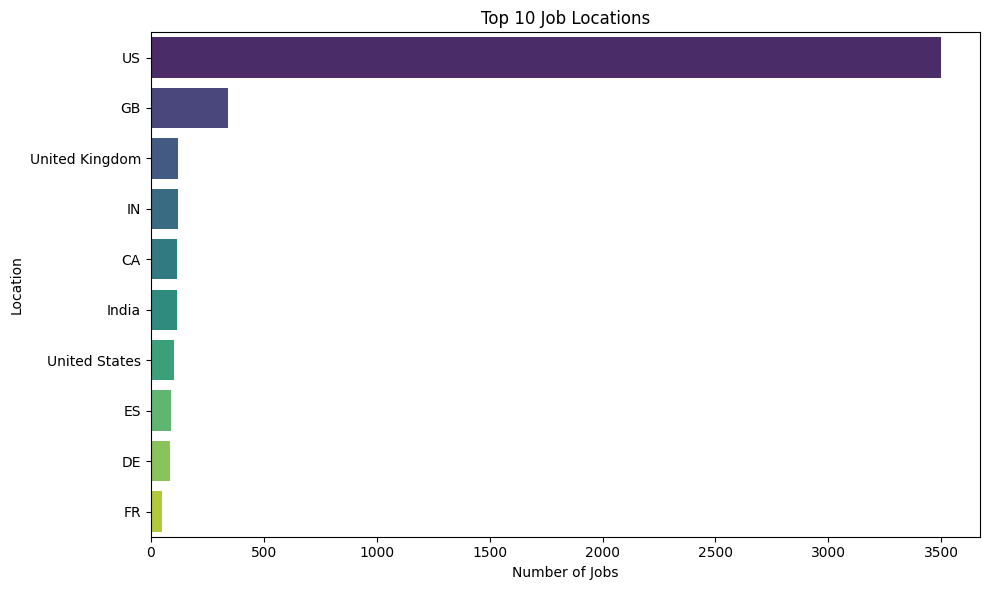

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\246302752.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', palette='coolwarm')


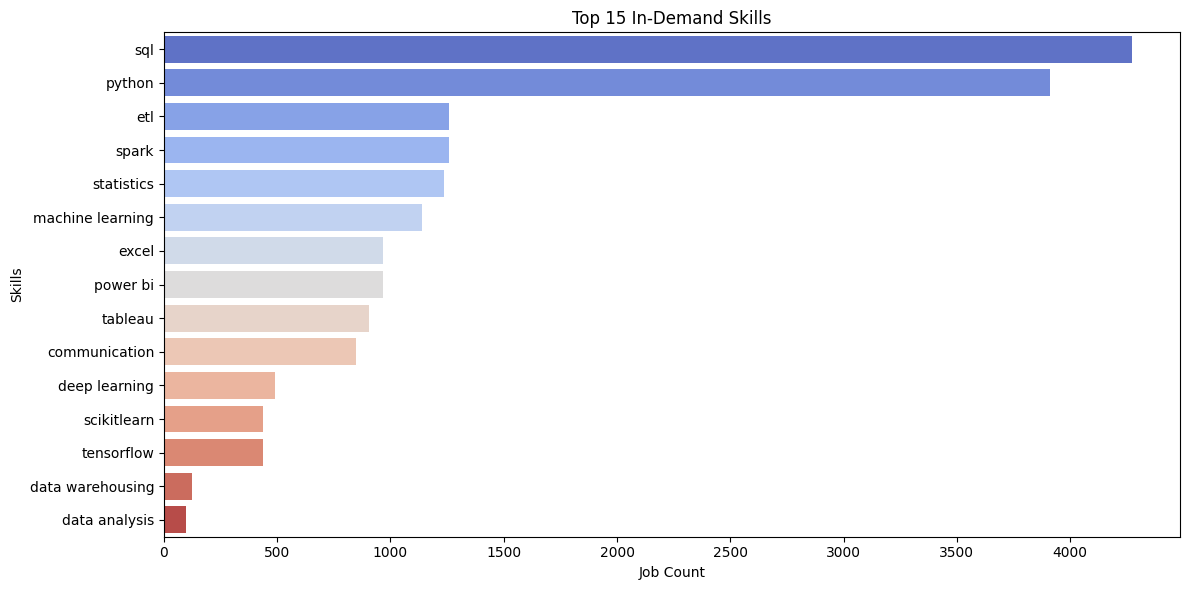

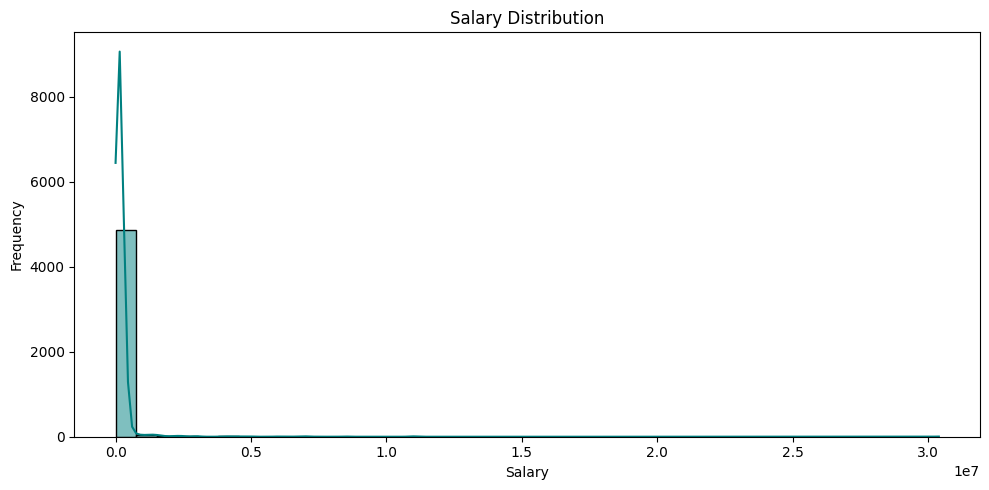

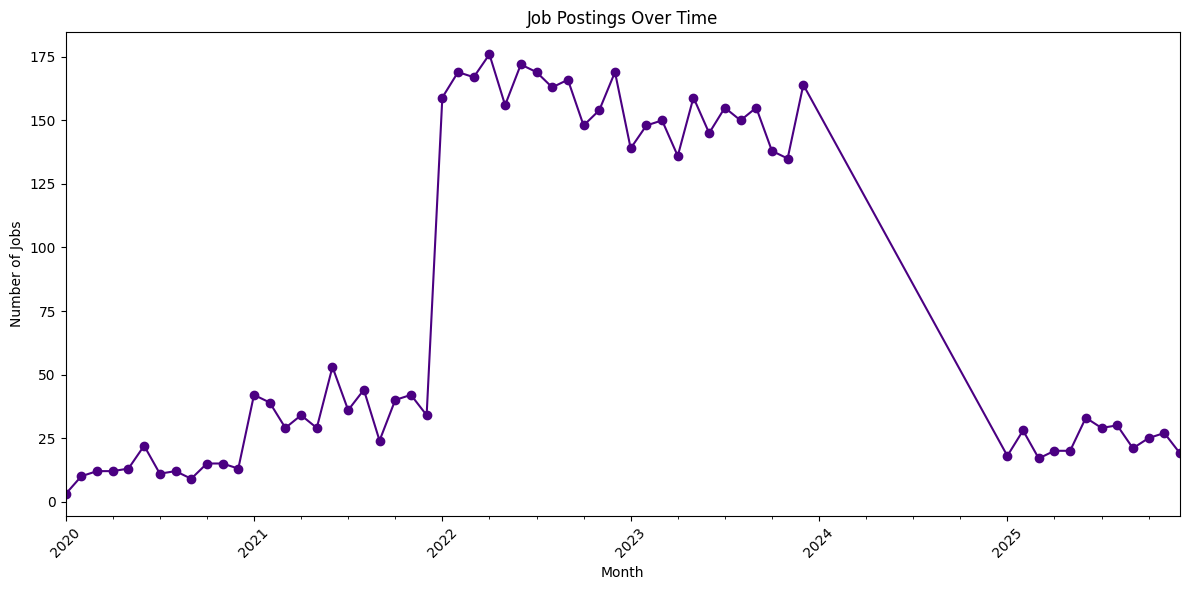

In [8]:
# --- EDA ---

# Top Job Titles
if title_col:
    print("\nTop 10 Job Titles:")
    print(df[title_col].value_counts().head(10))

# Top Locations
if location_col:
    print("\nTop 10 Locations:")
    print(df[location_col].value_counts().head(10))

    # Plot top 10 locations
    top_locations = df[location_col].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
    plt.title('Top 10 Job Locations')
    plt.xlabel('Number of Jobs')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()
else:
    print("\n[Warning] No location column found.")

# Top Skills
if skills_col:
    all_skills = df[skills_col].dropna().str.split(',').sum()
    all_skills = [skill.strip() for skill in all_skills if skill.strip()]
    top_skills = Counter(all_skills).most_common(15)

    skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    plt.figure(figsize=(12,6))
    sns.barplot(data=skills_df, x='Count', y='Skill', palette='coolwarm')
    plt.title('Top 15 In-Demand Skills')
    plt.xlabel('Job Count')
    plt.ylabel('Skills')
    plt.tight_layout()
    plt.show()
else:
    print("\n[Warning] No skills column found.")

# Salary Distribution
if salary_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[salary_col], bins=40, kde=True, color='teal')
    plt.title('Salary Distribution')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Jobs over Time
if date_col:
    df['posting_month'] = df[date_col].dt.to_period('M')
    monthly_jobs = df.groupby('posting_month').size()
    monthly_jobs.plot(kind='line', marker='o', figsize=(12, 6), color='indigo')
    plt.title("Job Postings Over Time")
    plt.ylabel("Number of Jobs")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🎯 Analysis Goals with Python Code
##  1. Top In-Demand Skills

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\2930311117.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', palette='coolwarm')


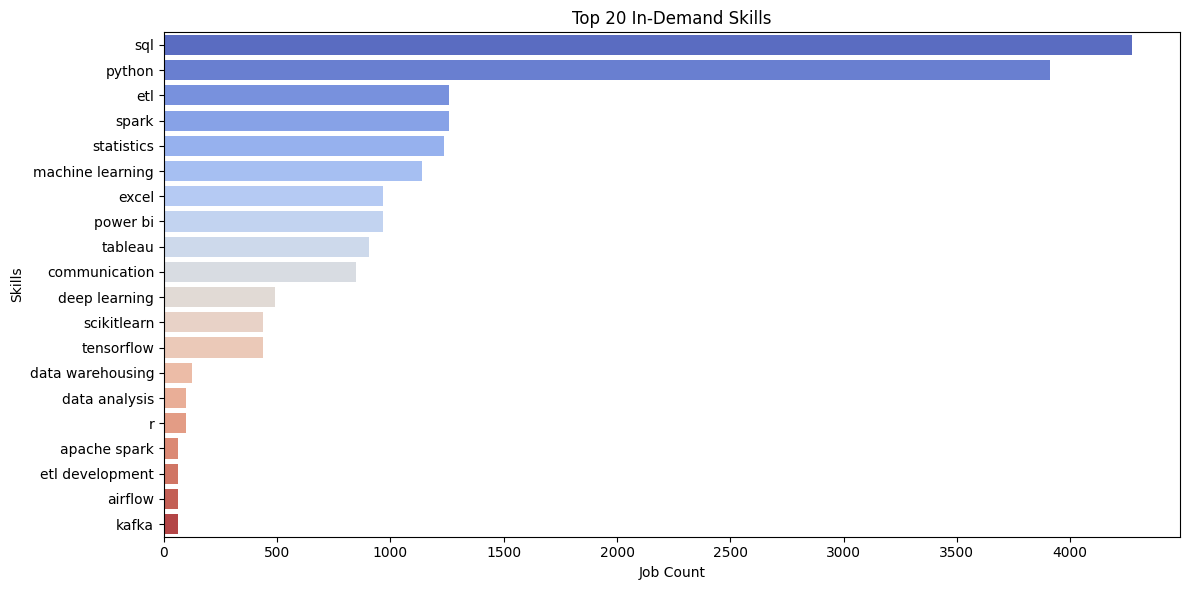

In [9]:
# Count most frequent skills
from collections import Counter

if 'skills' in df.columns:
    all_skills = df['skills'].dropna().str.split(',').sum()
    all_skills = [skill.strip() for skill in all_skills if skill.strip()]
    top_skills = Counter(all_skills).most_common(20)

    skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(data=skills_df, x='Count', y='Skill', palette='coolwarm')
    plt.title('Top 20 In-Demand Skills')
    plt.xlabel('Job Count')
    plt.ylabel('Skills')
    plt.tight_layout()
    plt.show()


# 🔹 2. Location-Wise Job Distribution



C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\601495800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')


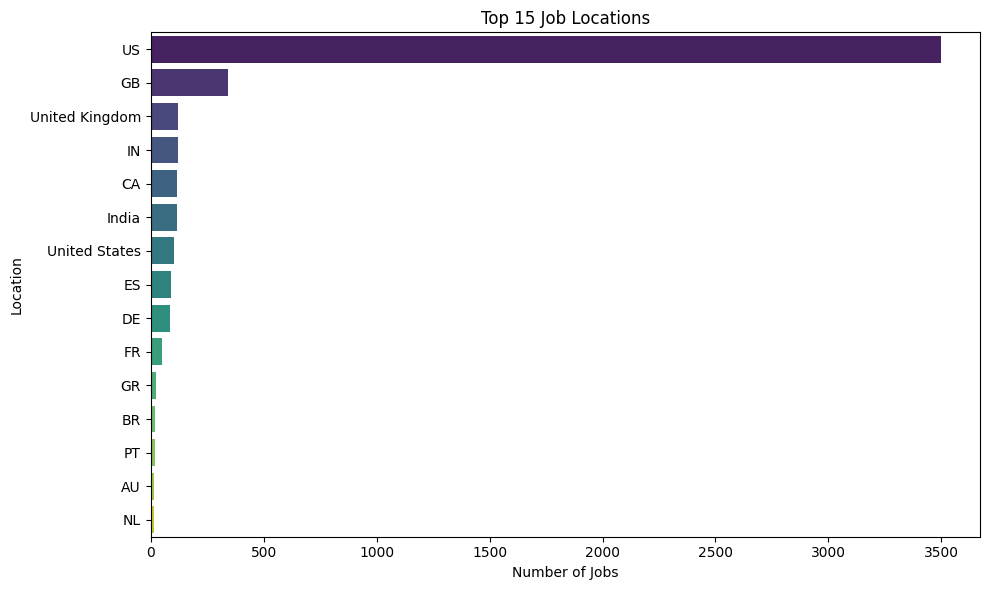

In [11]:
top_locations = df['company_location'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 15 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


# 3. Experience Level Trends

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\1184898987.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=exp_counts.index, y=exp_counts.values, palette=colors)


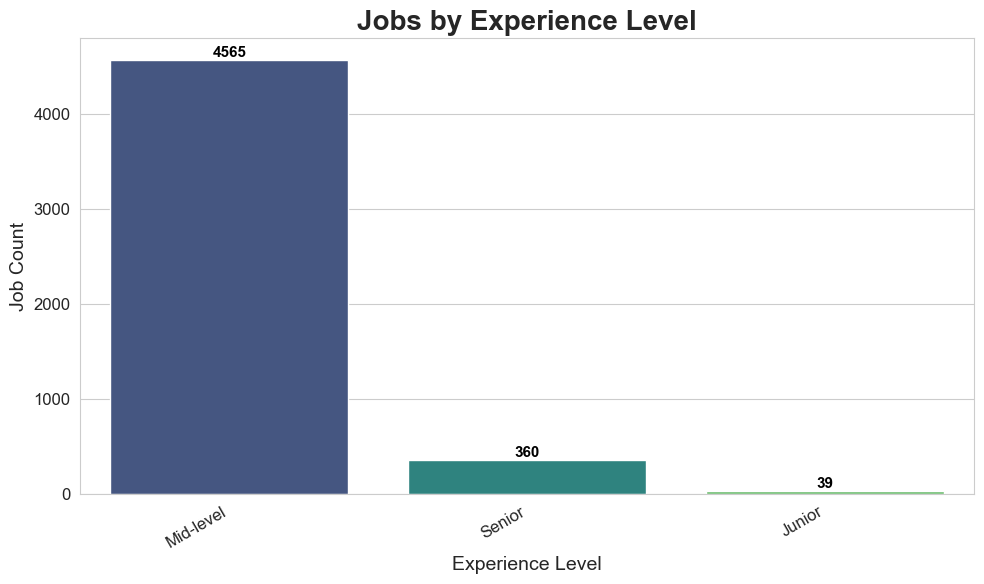

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

# Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Check and plot
if 'experience_level' in df.columns:
    exp_counts = df['experience_level'].value_counts()

    plt.figure(figsize=(10,6))
    colors = sns.color_palette("viridis", len(exp_counts))  # Gradient color

    bars = sns.barplot(x=exp_counts.index, y=exp_counts.values, palette=colors)

    # Add value labels on top of bars
    for bar in bars.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1, 
            f'{int(bar.get_height())}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
        )

    plt.title('Jobs by Experience Level', fontsize=20, weight='bold')
    plt.xlabel('Experience Level', fontsize=14)
    plt.ylabel('Job Count', fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("❗ 'experience_level' column not found.")


# 4. Salary Trends by Role or Skill

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\1118907321.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(
C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\1118907321.py:37: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SAGA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


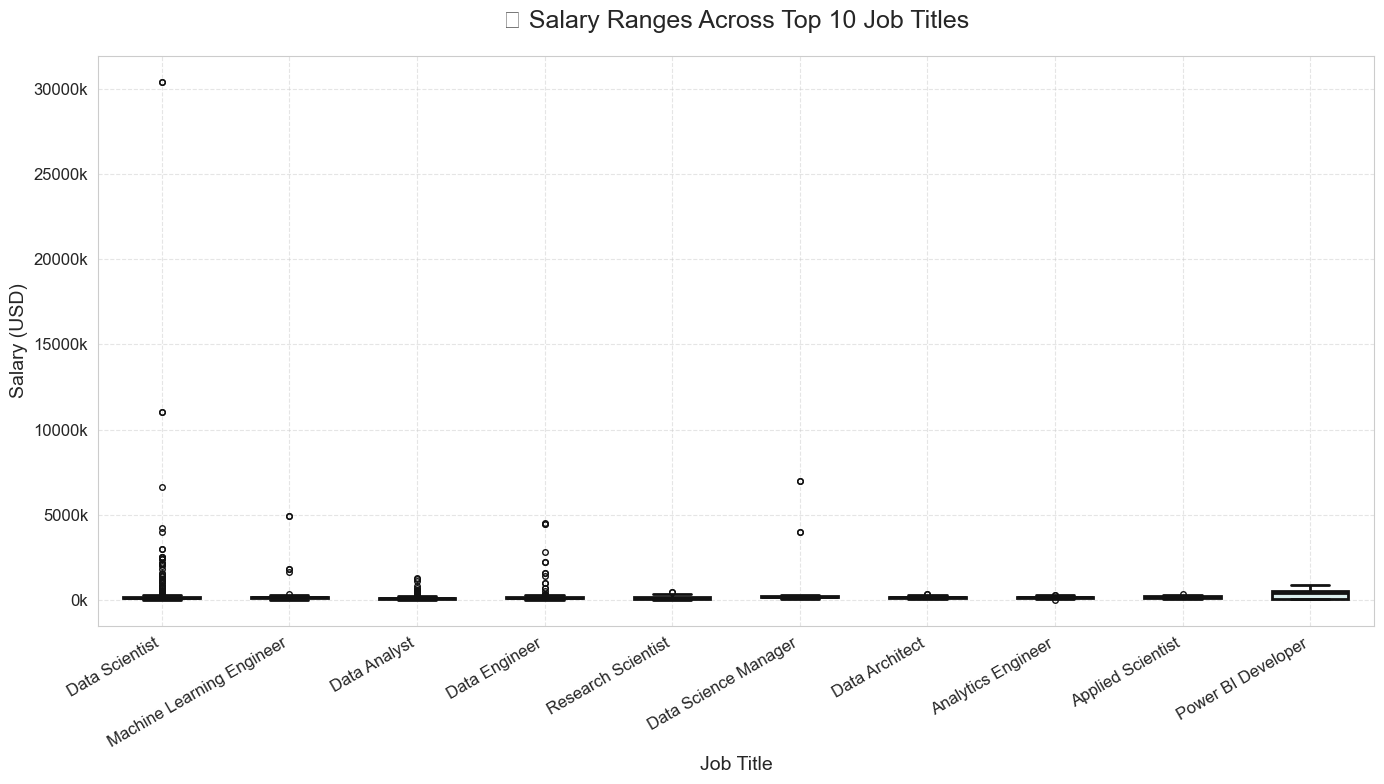

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Make sure salary is numeric
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Top 10 job titles with most counts
if 'job_title' in df.columns and 'salary' in df.columns:
    top_jobs = df['job_title'].value_counts().head(10).index
    salary_by_job = df[df['job_title'].isin(top_jobs)][['job_title', 'salary']]

    # Start plotting (inside the if block)
    plt.figure(figsize=(14, 8))
    box = sns.boxplot(
        data=salary_by_job,
        x='job_title',
        y='salary',
        palette='cubehelix',
        width=0.6,
        fliersize=4,
        linewidth=2
    )
    
    plt.title('💰 Salary Ranges Across Top 10 Job Titles', fontsize=18, pad=20)
    plt.xlabel('Job Title', fontsize=14)
    plt.ylabel('Salary (USD)', fontsize=14)

    # Format salary axis to show in 'k' (thousands)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


# 🔹 5. Industry-Wise Job Count

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\1442170698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')


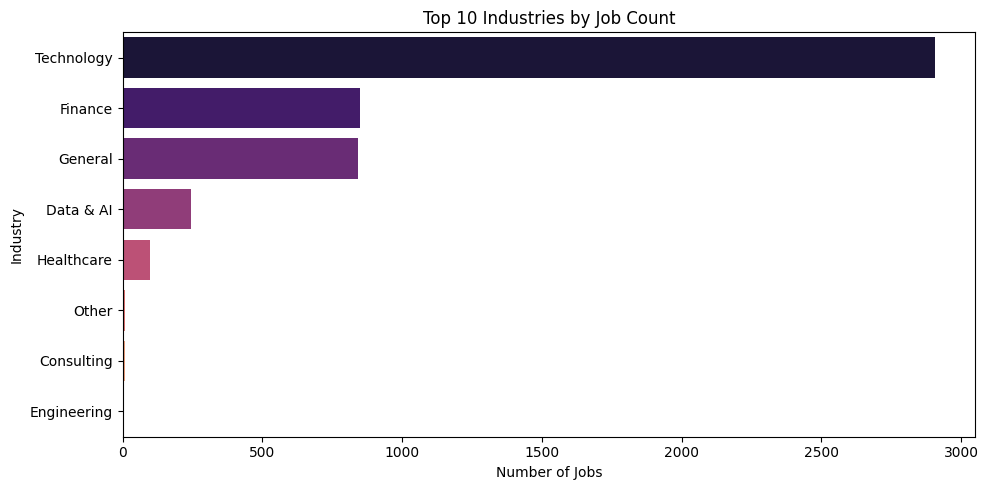

In [17]:
if 'industry' in df.columns:
    top_industries = df['industry'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')
    plt.title('Top 10 Industries by Job Count')
    plt.xlabel('Number of Jobs')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.show()


# 6. Remote vs In-Office Roles

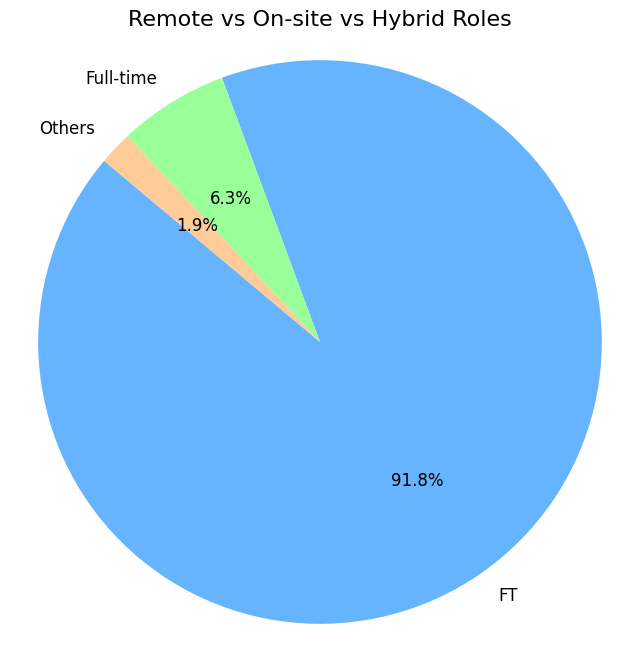

In [24]:
# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Choose the correct column
if 'employment_type' in df.columns:
    work_type_counts = df['employment_type'].value_counts()

    # Group smaller categories into 'Others'
    threshold = 0.03  # Categories smaller than 3% will be grouped
    work_type_counts = work_type_counts[work_type_counts / work_type_counts.sum() > threshold]
    others = df['employment_type'].value_counts()[df['employment_type'].value_counts() / df['employment_type'].value_counts().sum() <= threshold].sum()
    work_type_counts['Others'] = others

    # Plot
    plt.figure(figsize=(8,8))
    work_type_counts.plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'],
        textprops={'fontsize': 12}  # Bigger font size
    )
    plt.title('Remote vs On-site vs Hybrid Roles', fontsize=16)
    plt.ylabel('')
    plt.axis('equal')  # Keep it a circle
    plt.show()
else:
    print("❗ 'employment_type' column not found.")



# . Skill Count vs Salary (Colored by Experience Level)

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\3824430672.py:37: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SAGA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


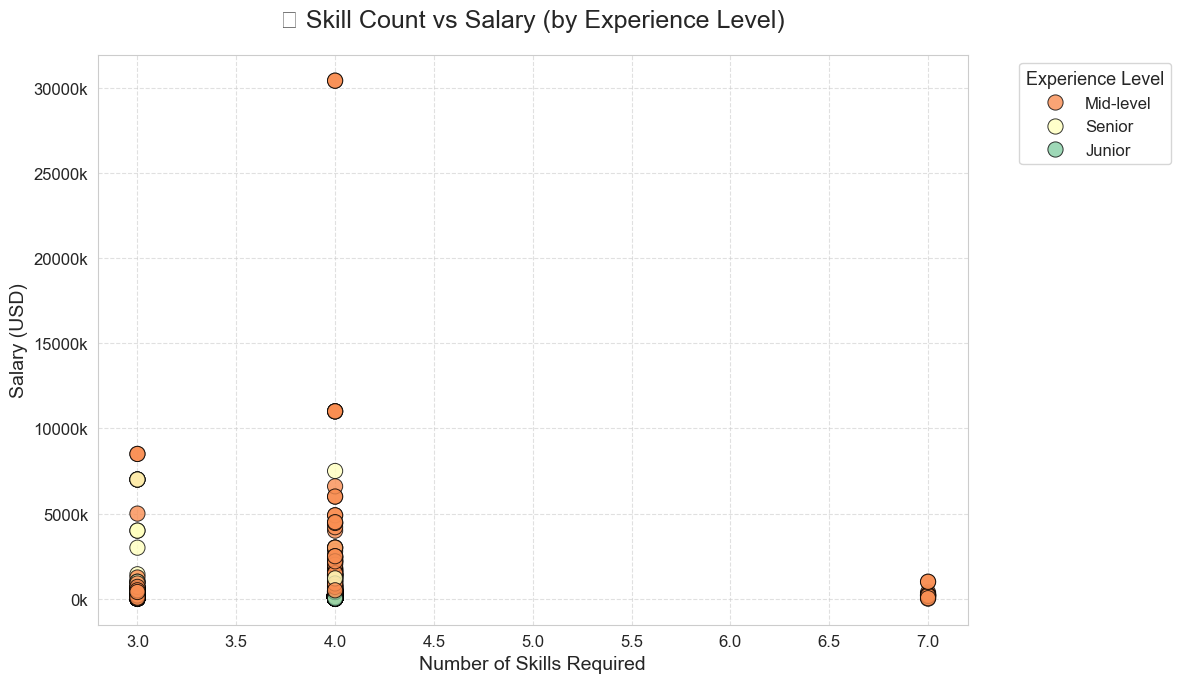

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ensure salary is numeric
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Plot Skill Count vs Salary
if 'salary' in df.columns and 'skill_count' in df.columns and 'experience_level' in df.columns:
    plt.figure(figsize=(12, 7))
    
    scatter = sns.scatterplot(
        data=df,
        x='skill_count',
        y='salary',
        hue='experience_level',
        palette='Spectral',
        alpha=0.8,
        s=120,                 # Bigger points for better visibility
        edgecolor='black',
        linewidth=0.7          # Thin black edge around points
    )
    
    plt.title('💼 Skill Count vs Salary (by Experience Level)', fontsize=18, pad=20)
    plt.xlabel('Number of Skills Required', fontsize=14)
    plt.ylabel('Salary (USD)', fontsize=14)

    # Y-axis salary formatting (example: 10k, 20k instead of big numbers)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)
    plt.tight_layout()
    plt.show()


### Companies mostly ask for 3–4 skills regardless of the job.

### Salary is much more influenced by experience level than by the number of skills listed.

### Skill count does not strongly predict salary based on this plot. 

# 2. Salary Distribution by Experience Level (Box Plot)

C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\2366993445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


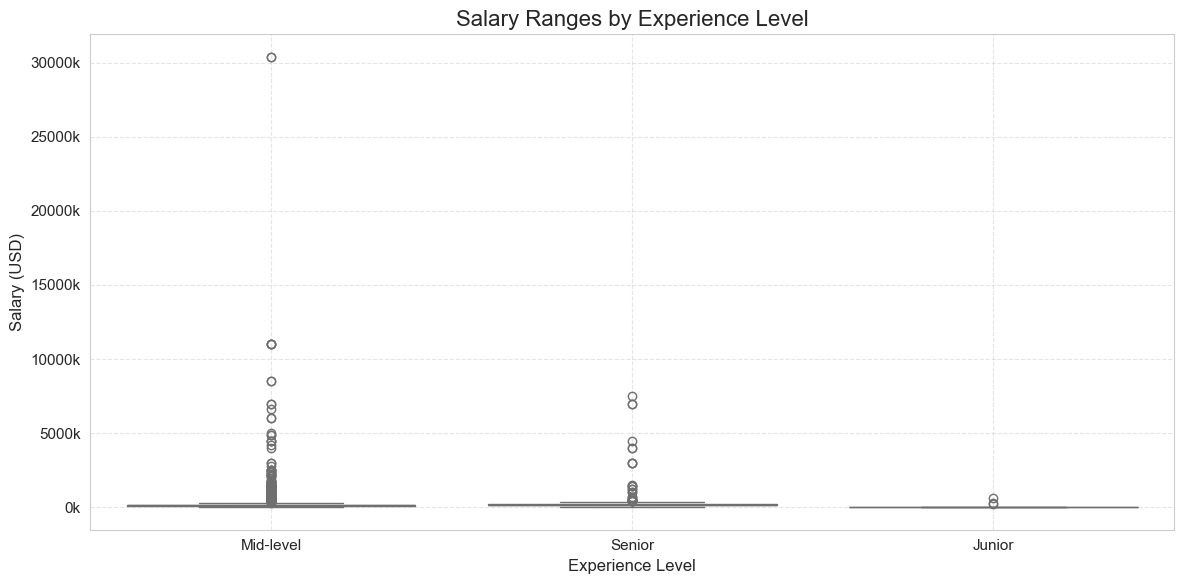

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure salary is numeric
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Now plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='experience_level',
    y='salary',
    palette='pastel'
)

plt.title('Salary Ranges by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

# Format y-axis properly
import matplotlib.ticker as ticker
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


# 3. Correlation Matrix (for Numeric Features)


C:\Users\SAGA\AppData\Local\Temp\ipykernel_15700\3792204159.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SAGA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


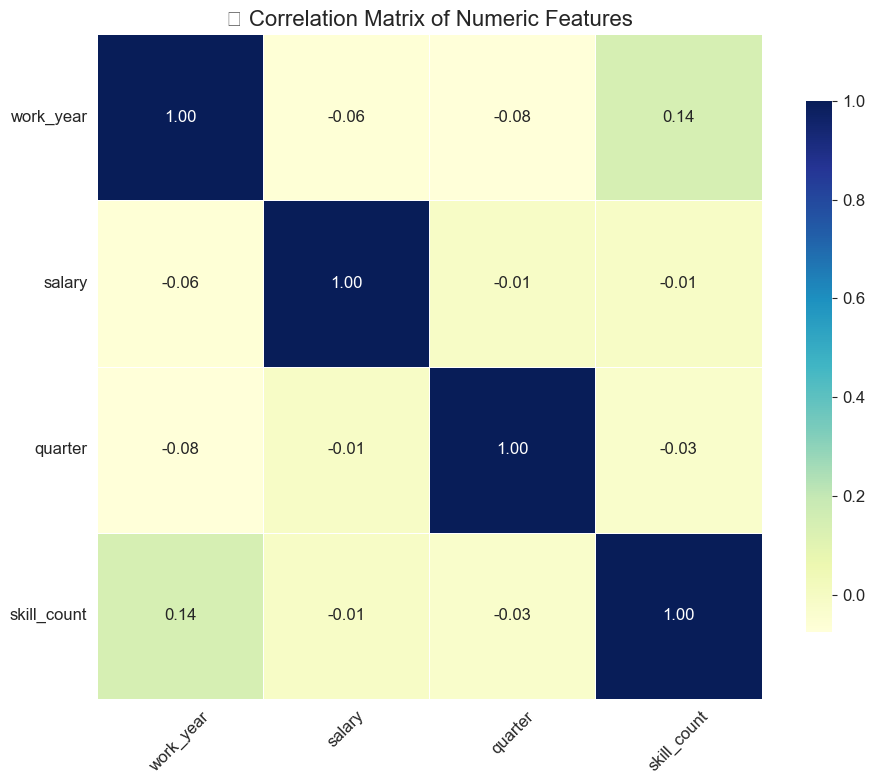

In [43]:
# Correlation Matrix for numerical columns
numeric_cols = df.select_dtypes(include=np.number)

if not numeric_cols.empty:
    plt.figure(figsize=(10, 8))
    corr = numeric_cols.corr()

    sns.heatmap(
        corr,
        annot=True,
        cmap='YlGnBu',
        fmt='.2f',
        linewidths=0.5,
        square=True,
        cbar_kws={"shrink": 0.8}
    )
    plt.title('📊 Correlation Matrix of Numeric Features', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



In [5]:
import pandas as pd

# Load data
df = pd.read_csv("Data_job.csv")

# Rename and clean salary column if needed
if 'salary_in_usd' not in df.columns:
    for col in df.columns:
        if 'salary' in col.lower():
            df.rename(columns={col: 'salary_in_usd'}, inplace=True)

# Convert salary to numeric
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

# Fill missing salary with median
df.fillna({'salary_in_usd': df['salary_in_usd'].median()}, inplace=True)

# Create experience_level if missing
if 'experience_level' not in df.columns:
    df['experience_level'] = pd.cut(
        df['salary_in_usd'],
        bins=[0, 50000, 100000, 200000, df['salary_in_usd'].max()],
        labels=['Entry Level', 'Mid Level', 'Senior Level', 'Executive']
    )
    

# Skill count feature
if 'skills' in df.columns:
    df['skill_count'] = df['skills'].fillna('').apply(lambda x: len(x.split(',')))
else:
    df['skill_count'] = 0
# Create the mapping dictionary
country_mapping = {
    "DE": "Germany",
    "HN": "Honduras",
    "HU": "Hungary",
    "NZ": "New Zealand",
    "FR": "France",
    "PK": "Pakistan",
    "CN": "China",
    "GR": "Greece",
    "AE": "United Arab Emirates",
    "NL": "Netherlands",
    "MX": "Mexico",
    "CA": "Canada",
    "AT": "Austria",
    "NG": "Nigeria",
    "ES": "Spain",
    "PT": "Portugal",
    "DK": "Denmark",
    "IT": "Italy",
    "HR": "Croatia",
    "LU": "Luxembourg",
    "PL": "Poland",
    "SG": "Singapore",
    "BR": "Brazil",
    "BE": "Belgium",
    "UA": "Ukraine",
    "IL": "Israel",
    "RU": "Russia",
    "MT": "Malta",
    "VN": "Vietnam",
    "AS": "American Samoa",
    "TR": "Turkey",
    "IR": "Iran",
    "CO": "Colombia",
    "MD": "Moldova",
    "KE": "Kenya",
    "SI": "Slovenia",
    "CH": "Switzerland",
    "HK": "Hong Kong",
    "EE": "Estonia",
    "MY": "Malaysia",
    "AU": "Australia",
    "IE": "Ireland",
    "AM": "Armenia",
    "BA": "Bosnia and Herzegovina",
    "MK": "North Macedonia",
    "LV": "Latvia",
    "TH": "Thailand",
    "LT": "Lithuania",
    "MA": "Morocco",
    "CR": "Costa Rica",
    "AL": "Albania",
    "AR": "Argentina",
    "FI": "Finland",
    "BO": "Bolivia",
    "PH": "Philippines",
    "ID": "Indonesia",
    "EG": "Egypt",
    "DZ": "Algeria",
    "BS": "Bahamas",
    "PR": "Puerto Rico",
    "GH": "Ghana"
}

# Example list of country codes (from your dataset)
codes = ['DE', 'FR', 'CA', 'MX', 'ES', 'BR', 'NG', 'IN']  # IN is not in mapping

# Map the codes to country names
mapped_countries = [country_mapping.get(code, "Unknown") for code in codes]

print(mapped_countries)

# Save cleaned data
df.to_csv("new_job_data.csv", index=False)


['Germany', 'France', 'Canada', 'Mexico', 'Spain', 'Brazil', 'Nigeria', 'Unknown']


In [6]:
df=pd.read_csv("new_job_data.csv")